In [1]:
cd '/home/saurabh/Documents/NN_learn'

/home/saurabh/Documents/NN_learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from util.cifar10_loader import Cifar10Loader
from util.data_visualizer import DataVisualizer
%matplotlib inline

Using TensorFlow backend.


In [3]:
def shuffle_and_split(X, y, split=0.8):
    indexes = np.arange(X.shape[0])
    np.random.shuffle(indexes)
    X_train = X[indexes[:int(split*X.shape[0])]]
    y_train = y[indexes[:int(split*X.shape[0])]]    
    X_val = X[indexes[int(split*X.shape[0]):]]
    y_val = y[indexes[int(split*X.shape[0]):]]    
    return X_train, y_train, X_val, y_val

In [4]:
model_path = './models'
data_loader = Cifar10Loader()
dv = DataVisualizer()

X_train_cifar, y_train_cifar, X_test, y_test_cifar, labels = data_loader.load_cifar10('./Datasets/cifar-10')
X_train, y_train_cifar, X_val, y_val_cifar = shuffle_and_split(X_train_cifar, y_train_cifar, split=0.8)

y_train = keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_val = keras.utils.to_categorical(y_val_cifar, num_classes=10)
y_test = keras.utils.to_categorical(y_test_cifar, num_classes=10)

In [5]:
# data_format = channels_last
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train_cifar).shape[0])

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)
(10000, 32, 32, 3) (10000, 10)
10


### VGG like convnet

In [6]:
model = Sequential()

# 1. 2 Convs + 1 Pooling
model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', 
                 use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                 strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), 
                 kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                 kernel_constraint=None, bias_constraint=None))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2. 2 Convs + 1 Pooling          
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3. fully connected layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# 4. output_layer         
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
loss, acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nTest accuracy:', acc*100)
print('Test loss:', loss)

 9728/10000 [============================>.] - ETA: 0s
Test accuracy: 10.66
Test loss: 2.3018590744


In [8]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
40000/40000 [==============================] - 4s - loss: 1.8223 - acc: 0.3207     
Epoch 2/200
40000/40000 [==============================] - 4s - loss: 1.5355 - acc: 0.4405     
Epoch 3/200
40000/40000 [==============================] - 4s - loss: 1.4332 - acc: 0.4833     
Epoch 4/200
40000/40000 [==============================] - 4s - loss: 1.3678 - acc: 0.5111     
Epoch 5/200
40000/40000 [==============================] - 4s - loss: 1.3213 - acc: 0.5295     
Epoch 6/200
40000/40000 [==============================] - 4s - loss: 1.2735 - acc: 0.5496     
Epoch 7/200
40000/40000 [==============================] - 4s - loss: 1.2342 - acc: 0.5634     
Epoch 8/200
40000/40000 [==============================] - 4s - loss: 1.2067 - acc: 0.5733     
Epoch 9/200
40000/40000 [==============================] - 4s - loss: 1.1759 - acc: 0.5814     
Epoch 10/200
40000/40000 [==============================] - 4s - loss: 1.1594 - acc: 0.5947     
Epoch 11/200
40000/40000 [=============

40000/40000 [==============================] - 4s - loss: 0.7380 - acc: 0.7408     
Epoch 169/200
40000/40000 [==============================] - 4s - loss: 0.7414 - acc: 0.7392     
Epoch 170/200
40000/40000 [==============================] - 4s - loss: 0.7417 - acc: 0.7387     
Epoch 171/200
40000/40000 [==============================] - 4s - loss: 0.7358 - acc: 0.7398     
Epoch 172/200
40000/40000 [==============================] - 4s - loss: 0.7392 - acc: 0.7423     
Epoch 173/200
40000/40000 [==============================] - 4s - loss: 0.7477 - acc: 0.7349     
Epoch 174/200
40000/40000 [==============================] - 4s - loss: 0.7396 - acc: 0.7412     
Epoch 175/200
40000/40000 [==============================] - 4s - loss: 0.7405 - acc: 0.7390     
Epoch 176/200
40000/40000 [==============================] - 4s - loss: 0.7367 - acc: 0.7365     
Epoch 177/200
40000/40000 [==============================] - 4s - loss: 0.7381 - acc: 0.7400     
Epoch 178/200
40000/40000 [=======

In [9]:
loss, acc = model.evaluate(X_train, y_train, batch_size=64)
print('\nTrain accuracy:', acc*100)
print('Train loss:', loss)

loss, acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nTest accuracy:', acc*100)
print('Test loss:', loss)

38912/40000 [============================>.] - ETA: 0s
Train accuracy: 84.5775
Train loss: 0.44740791173
 9856/10000 [============================>.] - ETA: 0s
Test accuracy: 74.88
Test loss: 0.72321331501


In [10]:
history_1 = model.fit(X_train, y_train, epochs=400, batch_size=64, initial_epoch=200)

Epoch 201/400
40000/40000 [==============================] - 4s - loss: 0.7287 - acc: 0.7420     
Epoch 202/400
40000/40000 [==============================] - 4s - loss: 0.7338 - acc: 0.7419     
Epoch 203/400
40000/40000 [==============================] - 3s - loss: 0.7302 - acc: 0.7420     
Epoch 204/400
40000/40000 [==============================] - 3s - loss: 0.7288 - acc: 0.7427     
Epoch 205/400
40000/40000 [==============================] - 4s - loss: 0.7296 - acc: 0.7421     
Epoch 206/400
40000/40000 [==============================] - 4s - loss: 0.7340 - acc: 0.7422     
Epoch 207/400
40000/40000 [==============================] - 4s - loss: 0.7293 - acc: 0.7439     
Epoch 208/400
40000/40000 [==============================] - 4s - loss: 0.7320 - acc: 0.7410     
Epoch 209/400
40000/40000 [==============================] - 4s - loss: 0.7249 - acc: 0.7445     
Epoch 210/400
40000/40000 [==============================] - 4s - loss: 0.7248 - acc: 0.7442     
Epoch 211/400
40000/

40000/40000 [==============================] - 3s - loss: 0.7141 - acc: 0.7496     
Epoch 368/400
40000/40000 [==============================] - 3s - loss: 0.7055 - acc: 0.7493     
Epoch 369/400
40000/40000 [==============================] - 3s - loss: 0.7088 - acc: 0.7520     
Epoch 370/400
40000/40000 [==============================] - 3s - loss: 0.7094 - acc: 0.7502     
Epoch 371/400
40000/40000 [==============================] - 3s - loss: 0.7082 - acc: 0.7502     
Epoch 372/400
40000/40000 [==============================] - 3s - loss: 0.7084 - acc: 0.7485     
Epoch 373/400
40000/40000 [==============================] - 4s - loss: 0.7039 - acc: 0.7506     
Epoch 374/400
40000/40000 [==============================] - 3s - loss: 0.7048 - acc: 0.7521     
Epoch 375/400
40000/40000 [==============================] - 4s - loss: 0.7069 - acc: 0.7503     
Epoch 376/400
40000/40000 [==============================] - 4s - loss: 0.7036 - acc: 0.7524     
Epoch 377/400
40000/40000 [=======

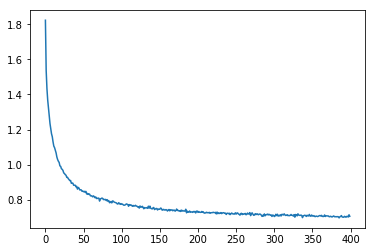

In [12]:
plt.plot(history.history['loss'] + history_1.history['loss'])

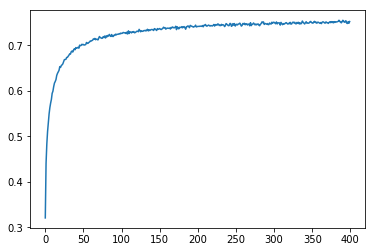

In [13]:
plt.plot(history.history['acc'] + history_1.history['acc'])

In [14]:
loss, acc = model.evaluate(X_train, y_train, batch_size=64)
print('\nTrain accuracy:', acc*100)
print('Train loss:', loss)

loss, acc = model.evaluate(X_test, y_test, batch_size=64)
print('\nTest accuracy:', acc*100)
print('Test loss:', loss)

40000/40000 [==============================] - 1s     

Train accuracy: 86.435
Train loss: 0.391874557948
 9664/10000 [===========================>..] - ETA: 0s
Test accuracy: 76.34
Test loss: 0.707630957222


In [15]:
model.save('models/cnn_for_cifar10_v2.h5')

In [18]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fce7496b128>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fce65ec8320>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fce65e7fdd8>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fce65ed5e48>,
 'dense_1': <keras.layers.core.Dense at 0x7fce65e26ef0>,
 'dense_2': <keras.layers.core.Dense at 0x7fce65ddeb70>,
 'dropout_1': <keras.layers.core.Dropout at 0x7fce65ec8f60>,
 'dropout_2': <keras.layers.core.Dropout at 0x7fce65e9ae80>,
 'dropout_3': <keras.layers.core.Dropout at 0x7fce65e196d8>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fce65db8e10>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fce7496bda0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7fce65e72b70>}

In [34]:
print(K.image_data_format())
model.summary()

channels_last
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0      

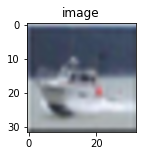

In [32]:
image = X_train[1]
plt.figure(figsize=(2,2))
plt.title('image')
plt.imshow(image, interpolation="spline16")

# Visualizing weights

- trying to visualize inputs that maximize the activation of the filters
- We first define a loss function that will seek to maximize the activation of a specific filter (filter_index) in a specific layer (layer_name)
- It is important to normalize the gradient of the pixels of the input image, which avoids very small and very large gradients and ensures a smooth gradient ascent process.
- then perform gradient ascent in the input space with regard to the filter activation loss we defined.

### Source:
- Blog: https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
- Full code: https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py

In [77]:
from keras import backend as K

layer_name = 'conv2d_2'
input_img = model.input
num_filters = 16 #32,16

In [78]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [79]:
kept_filters = []
for filter_index in range(num_filters):
    print('Processing filter %d' % filter_index)
    # we build a loss function that maximizes the activation of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    input_img_data = np.random.random((1, 32, 32, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(50):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

#        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        print('Filter considered')
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))

kept_filters.sort(key=lambda x: x[1], reverse=True)
print('Num kept filters:', len(kept_filters))        

Processing filter 0
Filter considered
Processing filter 1
Filter considered
Processing filter 2
Processing filter 3
Filter considered
Processing filter 4
Filter considered
Processing filter 5
Filter considered
Processing filter 6
Processing filter 7
Filter considered
Processing filter 8
Processing filter 9
Filter considered
Processing filter 10
Filter considered
Processing filter 11
Filter considered
Processing filter 12
Filter considered
Processing filter 13
Filter considered
Processing filter 14
Processing filter 15
Filter considered
Num kept filters: 12


## Conv layer 2 filters (total 16)

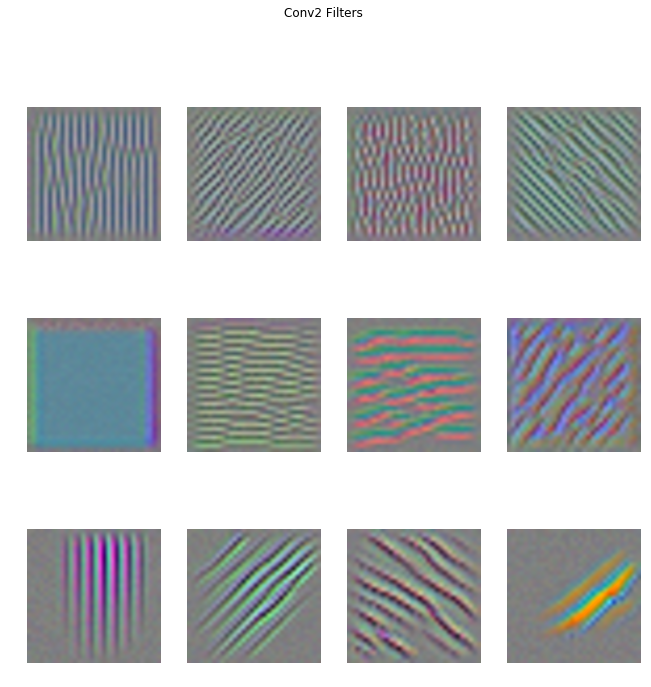

In [80]:
c = 0
fig, axes1 = plt.subplots(3, 4, figsize=(11,11))
plt.suptitle('Conv2 Filters')
for j in range(3):
    for k in range(4):
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(kept_filters[c][0], interpolation="spline16")
        c += 1

## Conv layer 1 filters (total 16)

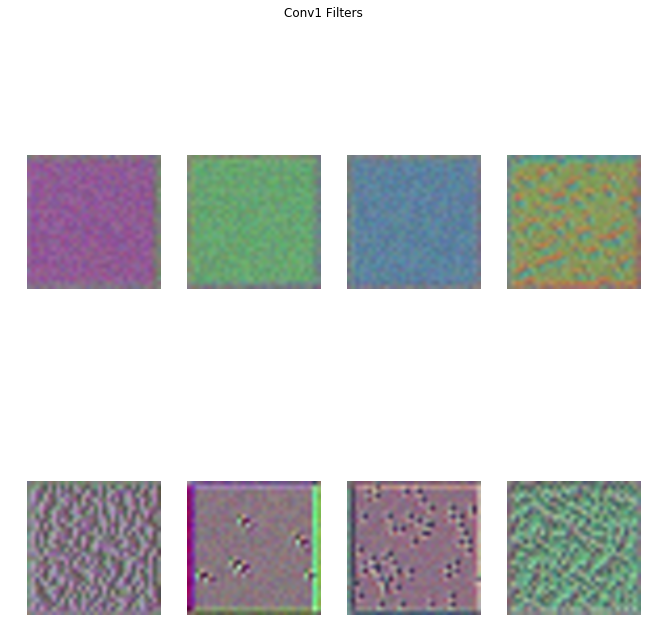

In [64]:
c = 0
fig, axes1 = plt.subplots(2, 4, figsize=(11,11))
plt.suptitle('Conv1 Filters')
for j in range(2):
    for k in range(4):
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(kept_filters[c][0], interpolation="spline16")
        c += 1

In [ ]:
# Save to file the filters
# # build a black picture with enough space for 8 x 8 filters of size 128 x 128, with a 5px margin in between
# margin = 5
# width = n * img_width + (n - 1) * margin
# height = n * img_height + (n - 1) * margin
# stitched_filters = np.zeros((width, height, 3))

# # fill the picture with our saved filters
# for i in range(n):
#     for j in range(n):
#         img, loss = kept_filters[i * n + j]
#         stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
#                          (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

In [19]:
from keras import applications

# build the VGG16 network
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).
vgg_layer_dict = dict([(layer.name, layer) for layer in model_vgg.layers])

In [20]:
vgg_layer_dict

{'block1_conv1': <keras.layers.convolutional.Conv2D at 0x7fce5c221b70>,
 'block1_conv2': <keras.layers.convolutional.Conv2D at 0x7fce5c2218d0>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x7fce5c1ac048>,
 'block2_conv1': <keras.layers.convolutional.Conv2D at 0x7fce5c11dcf8>,
 'block2_conv2': <keras.layers.convolutional.Conv2D at 0x7fce5c0fac18>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x7fce5c21f2e8>,
 'block3_conv1': <keras.layers.convolutional.Conv2D at 0x7fce5c233128>,
 'block3_conv2': <keras.layers.convolutional.Conv2D at 0x7fce5c18f748>,
 'block3_conv3': <keras.layers.convolutional.Conv2D at 0x7fce5c194b38>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x7fce577fdeb8>,
 'block4_conv1': <keras.layers.convolutional.Conv2D at 0x7fce57745dd8>,
 'block4_conv2': <keras.layers.convolutional.Conv2D at 0x7fce577a7668>,
 'block4_conv3': <keras.layers.convolutional.Conv2D at 0x7fce57760278>,
 'block4_pool': <keras.layers.pooling.MaxPooling2D at 0x7fce57730b0

In [83]:
v = [100,100,300,100,200,120,0]

In [85]:
print(np.argsort(v)[::-1])

[2 4 5 3 1 0 6]


In [87]:
print(np.argsort(-np.asarray(v)))

[2 4 5 0 1 3 6]
